<a href="https://colab.research.google.com/github/Krushikkk/Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -** Kishan Hirapara
##### **Team Member 2 -** Krushik Kalavadiya


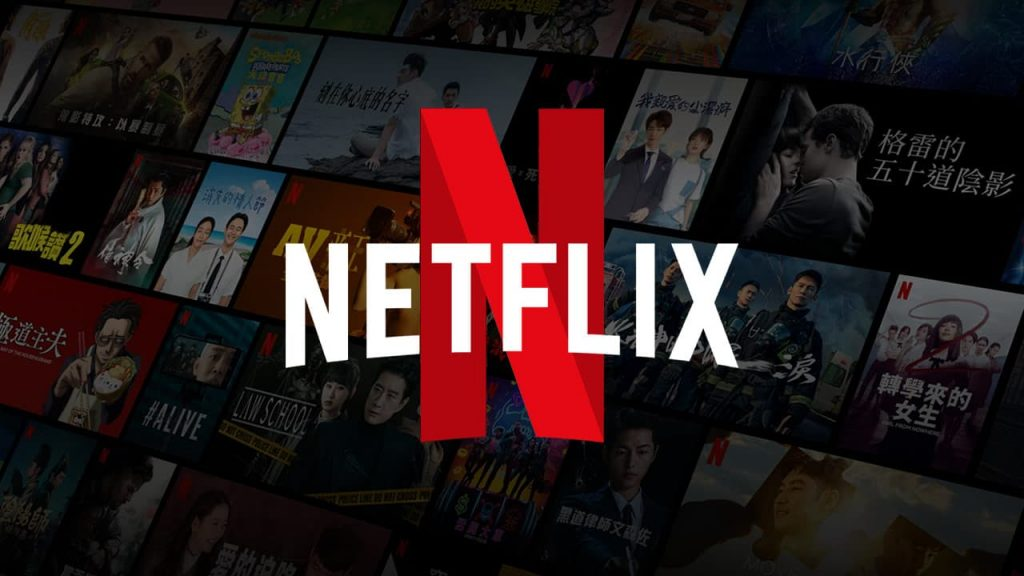

# **Project Summary -**

**Introduction:**

Netflix, one of the largest streaming platforms, has a vast library of movies and TV shows, which makes it difficult for users to find the content they are interested in. Clustering similar movies and TV shows based on their attributes such as genre, release year, rating, etc., can be a solution to this problem. This project aims to use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to users.


**Objective:**

The main objective of this project is to create a clustering model that groups similar movies and TV shows based on their attributes without any prior knowledge of their labels or categories. The ultimate goal is to improve the user experience on the Netflix platform by providing personalized recommendations that match the user's interests.

**Approach:**

Data Collection: Collecting data about movies and TV shows from the Netflix platform and other external sources.

Data Preprocessing: Cleaning and processing the collected data to remove any inconsistencies and transform it into a suitable format for clustering.

Feature Engineering: Selecting relevant attributes such as genre, release year, rating, etc., and extracting meaningful features from the data.

Clustering: Using unsupervised machine learning algorithms such as k-means, hierarchical clustering, etc., to cluster the movies and TV shows based on their attributes.
Model Evaluation: Evaluating the clustering model's performance using appropriate metrics such as silhouette score, Dunn index, etc.

Personalized Recommendations: Using the clustering results to provide personalized recommendations to users based on their viewing history and preferences.

Overall, this project will use unsupervised machine learning algorithms to cluster similar movies and TV shows and provide personalized recommendations to user

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**"Netflix, one of the leading streaming platforms, has a large collection of movies and TV shows. However, with such a vast library, it can be difficult for users to find content that they are interested in. The goal of this project is to use unsupervised machine learning techniques to cluster similar movies and TV shows based on their attributes such as genre, release year, rating, etc. This will enable Netflix to provide personalized recommendations to users based on their viewing history and preferences."**


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style= 'whitegrid', palette = 'mako')

# Import libraries for NLP
import re
import unicodedata
import nltk  
nltk.download('stopwords')
nltk.download('punkt')  
nltk.download('omw-1.4')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Import model libraries
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Import libraries For creating and customizing WordClouds
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Miscellaneous libraries
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset
df_original = pd.read_csv('/content/drive/MyDrive/Project/Project 5/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

# Copying data to preserve orignal file
df = df_original.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Text(0.5, 1.0, ' Visualising Missing Values')

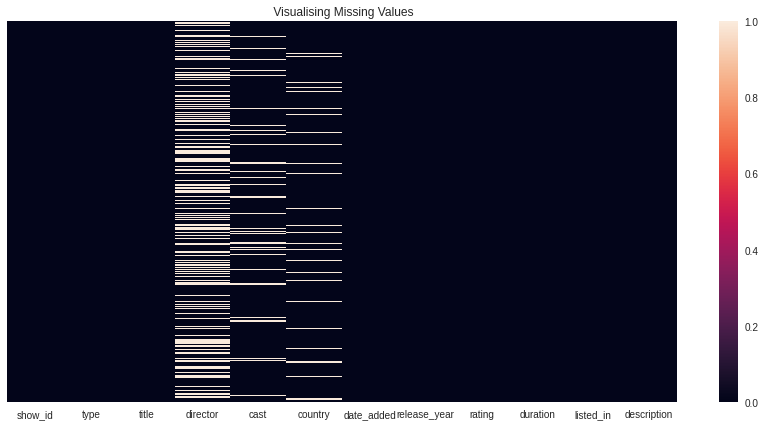

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,7))
sns.heatmap(df.isnull(), annot=False, yticklabels=False)
plt.title(" Visualising Missing Values")

### What did you know about your dataset?

Our dataset consists of 7787 rows and 12 columns, and there are no duplicated values in it but some of the columns - director, cast, country, date_added, and rating contain null values.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include ='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

show_id: Unique ID for each TV Show or Movie

type: Indicates if the entry is a TV Show or Movie

title: The title of the TV Show or Movie

director: The director of the Movie or TV Show

cast: The cast of the Movie or TV Show

country: The country where the Movie or TV Show was produced

date_added: The date when the Movie or TV Show was added to Netflix

release_year: The year the Movie or TV Show was released

rating: The rating given to the Movie or TV Show

duration: The length of the Movie or TV Show

listed_in: The category or genre of the Movie or TV Show

description: A brief summary of the Movie or TV Show

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [ ]:
# Value Counts of cast
df['cast'].value_counts()

David Attenborough                                                                                                                                                            18
Samuel West                                                                                                                                                                   10
Jeff Dunham                                                                                                                                                                    7
Kevin Hart                                                                                                                                                                     6
Michela Luci, Jamie Watson, Eric Peterson, Anna Claire Bartlam, Nicolas Aqui, Cory Doran, Julie Lemieux, Derek McGrath                                                         6
                                                                                                                   

In [ ]:
# Value Counts of rating
# Choosing the primary genre to simplify the analysis
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])
df['listed_in'].value_counts()

Dramas                          1384
Comedies                        1074
Documentaries                    751
Action & Adventure               721
International TV Shows           690
Children & Family Movies         502
Crime TV Shows                   369
Kids' TV                         359
Stand-Up Comedy                  321
Horror Movies                    244
British TV Shows                 232
Docuseries                       194
Anime Series                     148
International Movies             114
TV Comedies                      110
Reality TV                       102
Classic Movies                    77
TV Dramas                         62
Movies                            56
Thrillers                         49
TV Action & Adventure             37
Stand-Up Comedy & Talk Shows      33
Romantic TV Shows                 28
Classic & Cult TV                 21
Independent Movies                20
Anime Features                    19
Music & Musicals                  17
T

In [ ]:
# Value Counts of rating
df['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Handling the missing values
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
df.shape

(7777, 12)

In [ ]:
# Create a new features
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day 
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

In [ ]:
# Checking for head after seperating date ,month,year
df[["date_added","year_added","month_added"]].head()

,date_added,year_added,month_added
0,2020-08-14,2020,8
1,2016-12-23,2016,12
2,2018-12-20,2018,12
3,2017-11-16,2017,11
4,2020-01-01,2020,1


### What all manipulations have you done and insights you found?

We fill the null values in the 'director', 'cast', and 'country' columns with the string 'unknown' and we have filled the null values in the 'rating' column with the mode value. Finally, we have dropped the rows where the 'date_added' column has null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(Ho): The number of movie releases on Netflix is less than or equal to the number of TV show releases on Netflix.

Alternative hypothesis(H1): The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Load the Netflix dataset into a pandas DataFrame
netflix_df = pd.read_csv('netflix_data.csv')

# Count the number of movie and TV show releases on Netflix
num_movies = netflix_df[netflix_df['type'] == 'Movie'].shape[0]
num_tvshows = netflix_df[netflix_df['type'] == 'TV Show'].shape[0]

# Compute the proportion of movie and TV show releases on Netflix
prop_movies = num_movies / (num_movies + num_tvshows)
prop_tvshows = num_tvshows / (num_movies + num_tvshows)

# Set the null hypothesis proportion
p_null = prop_tvshows

# Perform the one-sided z-test to compare the proportions
count = num_movies
nobs = num_movies + num_tvshows
stat, p_val = proportions_ztest(count, nobs, p_null, alternative='larger')

# Print the results
print("Z-statistic:", stat)
print("p-value:", p_val)

# Determine if the null hypothesis is rejected or not
alpha = 0.05
if p_val < alpha:
    print("Reject the null hypothesis. The number of movie releases on Netflix is greater than the number of TV show releases on Netflix.")
else:
    print("Fail to reject the null hypothesis. The number of movie releases on Netflix is less than or equal to the number of TV show releases on Netflix.")

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

We already done.

### 2. Handling Outliers

We don't required outlier treatment because we don't have variables with outlier.

### 3. Categorical Encoding

we don't used any categorical encoding techniques in our analysis of the this data as it did not involve any categorical variables. Therefore, there was no need to apply any encoding techniques to convert categorical variables to numerical format for further analysis.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [ ]:
# We will be using text columns to create clusters for our data.

cluster_df = df[['title']]
df[['description','listed_in','director','cast','country']] = df[['description','listed_in','director','cast','country']].astype(str)
cluster_df['cluster_data'] = (df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'])
cluster_df.set_index('title', inplace = True)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,After a devastating earthquake hits Mexico Cit...
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalyptic world, rag-doll robots hi..."
21,A brilliant group of students become card-coun...


#### 1. Expand Contraction

In [ ]:
# Expand Contraction
# Define a function to expand contractions
def expand_contractions(text):
    contraction_patterns = [(r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'that\'s', 'that is'), (r'i\'m', 'i am'),
                            (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                            (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'),
                            (r'(\w+)\'d', '\g<1> would'), (r'daughter\'s', 'daughter is'),
                            (r'son\'s', 'son is'), (r'(\w+)ic', '\g<1>')]
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text

In [ ]:
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(expand_contractions)
cluster_df.head()

,cluster_data
title,
3%,In a future where the elite inhabit an island ...
7:19,"After a devastating earthquake hits Mexo City,..."
23:59,"When an army recruit is found dead, his fellow..."
9,"In a postapocalypt world, rag-doll robots hide..."
21,A brilliant group of students become card-coun...


#### 2. Lower Casing

In [ ]:
# Lower Casing
# Define the function to apply lower casing
def lowercase_text(text):
    return text.lower()

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lowercase_text)
cluster_df.head()

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,"after a devastating earthquake hits mexo city,..."
23:59,"when an army recruit is found dead, his fellow..."
9,"in a postapocalypt world, rag-doll robots hide..."
21,a brilliant group of students become card-coun...


#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# Define the function to remove punctuations
def remove_punctuation(text):
    import string 
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
    
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_punctuation)
cluster_df.head() 

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexo city ...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalypt world ragdoll robots hide i...
21,a brilliant group of students become cardcount...


#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# find rows with links in cluster_data
link_rows = cluster_df[cluster_df['cluster_data'].str.contains(r'http|www')]
top_5_link_rows = link_rows.sort_values(by='cluster_data', ascending=False).head(5)
top_5_link_rows

,cluster_data
title,


In [ ]:
# Remove URLs & Remove words and digits contain digits
# Define a function to remove words which containing digits
def remove_digits(text):
    text = re.sub(r'\w*\d\w*', '', text).strip()
    return text

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_digits)
cluster_df.head()  

,cluster_data
title,
3%,in a future where the elite inhabit an island ...
7:19,after a devastating earthquake hits mexo city ...
23:59,when an army recruit is found dead his fellow ...
9,in a postapocalypt world ragdoll robots hide i...
21,a brilliant group of students become cardcount...


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Define a function to remove stop words
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(remove_stopwords)
cluster_df.head()       

,cluster_data
title,
3%,future elite inhabit island paradise far crowd...
7:19,devastating earthquake hits mexo city trapped ...
23:59,army recruit found dead fellow soldiers forced...
9,postapocalypt world ragdoll robots hide fear d...
21,brilliant group students become cardcounting e...


#### 6. Tokenization

In [ ]:
# Tokenization
# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: word_tokenize(x))
cluster_df.head()       

,cluster_data
title,
3%,"[future, elite, inhabit, island, paradise, far..."
7:19,"[devastating, earthquake, hits, mexo, city, tr..."
23:59,"[army, recruit, found, dead, fellow, soldiers,..."
9,"[postapocalypt, world, ragdoll, robots, hide, ..."
21,"[brilliant, group, students, become, cardcount..."


#### 7. Text Normalization

In [ ]:
# Define a function to remove non-ascii characters
def remove_non_ascii(tokens):
    new_tokens = []
    for token in tokens:
        new_token = unicodedata.normalize('NFKD', token).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_tokens.append(new_token)
    return new_tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: remove_non_ascii(x))
cluster_df.head(10)       

,cluster_data
title,
3%,"[future, elite, inhabit, island, paradise, far..."
7:19,"[devastating, earthquake, hits, mexo, city, tr..."
23:59,"[army, recruit, found, dead, fellow, soldiers,..."
9,"[postapocalypt, world, ragdoll, robots, hide, ..."
21,"[brilliant, group, students, become, cardcount..."
46,"[genets, professor, experiments, treatment, co..."
122,"[awful, accident, couple, admitted, grisly, ho..."
187,"[one, high, school, students, attacks, dedated..."
706,"[doctor, goes, missing, psychiatrist, wife, tr..."


In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Define a function to lemmatize a list of tokens
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Apply the function to the cluster_data column
cluster_df['cluster_data'] = cluster_df['cluster_data'].apply(lambda x: lemmatize_tokens(x))
cluster_df.head()   

,cluster_data
title,
3%,"[future, elite, inhabit, island, paradise, far..."
7:19,"[devastating, earthquake, hit, mexo, city, tra..."
23:59,"[army, recruit, found, dead, fellow, soldier, ..."
9,"[postapocalypt, world, ragdoll, robot, hide, f..."
21,"[brilliant, group, student, become, cardcounti..."


##### Which text normalization technique have you used and why?

we used lemmatization because lemmatization produces a valid base word that has a meaning, whereas stemming produces an arbitrary base word that may not have any meaning on its own. It produces more accurate results in applications such as question-answering systems, and sentiment analysis. 

#### 8. Text Vectorization

In [ ]:
bag_of_words = cluster_df.cluster_data

In [ ]:
# Vectorizing Text
# Define a function of Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus 
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False, max_features = 20000)    
X = vectorizer.fit_transform(bag_of_words)
print(X.shape)

(7777, 20000)


In [ ]:
type(X)

scipy.sparse._csr.csr_matrix

In [ ]:
# Convert type of X to array  
X = X.toarray()

##### Which text vectorization technique have you used and why?

We used is TF-IDF (Term Frequency-Inverse Document Frequency) vectorization. We have used this technique because it combines both the Term Frequency and Inverse Document Frequency concepts. The main reason for using TF-IDF is to convert the text data into numerical data which can be used as input to various machine learning algorithms for text classification. In TF-IDF, the importance of each word in a document is determined by both its frequency (Term Frequency) and its rarity in the entire corpus (Inverse Document Frequency). This helps in capturing the importance of each word in the document and helps in creating a more meaningful representation of the text data.

### 5. Dimesionality Reduction

In [ ]:
# Dimesionality Reduction
pca = PCA()
pca.fit(X)

PCA()

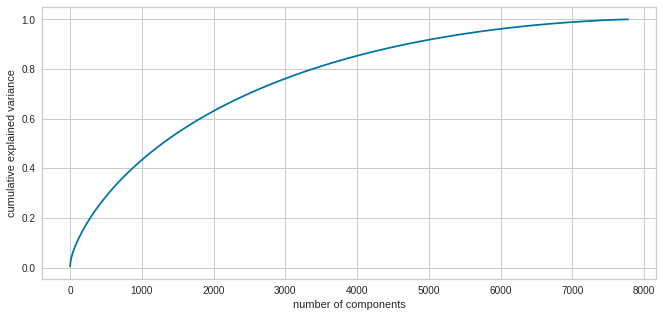

In [ ]:
# Lets plot explained var v/s comp to check how many components to be considered.
plt.figure(figsize=(11,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [ ]:
pca_tuned = PCA(n_components=0.85)
pca_tuned.fit(X)
X_transformed = pca_tuned.transform(X)
X_transformed.shape

(7777, 3959)

In [ ]:
X_transformed

array([[ 0.03459129,  0.05623025, -0.00435938, ...,  0.01070487,
         0.0025128 , -0.01446401],
       [-0.03366468,  0.01075213,  0.01753578, ...,  0.00927551,
        -0.00443079,  0.00910891],
       [-0.03557773,  0.01963105, -0.05411294, ...,  0.00323809,
        -0.008977  , -0.00253185],
       ...,
       [ 0.14603284, -0.03791657,  0.11467434, ..., -0.00062316,
        -0.01220958,  0.01482605],
       [ 0.05239966,  0.06776332,  0.00540174, ..., -0.00340052,
         0.01103228,  0.00562947],
       [ 0.18651905, -0.19710826,  0.14692759, ..., -0.00253811,
         0.00037934, -0.00130366]])

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes, we have text data, and after applying natural language processing techniques, we obtain high-dimensional features. However, high-dimensional data often suffers from the curse of dimensionality. This phenomenon refers to the fact that as the number of dimensions increases, the amount of data required to train a model accurately increases exponentially. Consequently, analyzing and visualizing the data becomes more challenging, and building models that can generalize well also becomes difficult.

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used Principal Component Analysis (PCA) for dimensionality reduction because high-dimensional data frequently suffers from the curse of dimensionality.

## ***7. ML Model Implementation***

### ML Model - 1

###**K-Means Clustering**

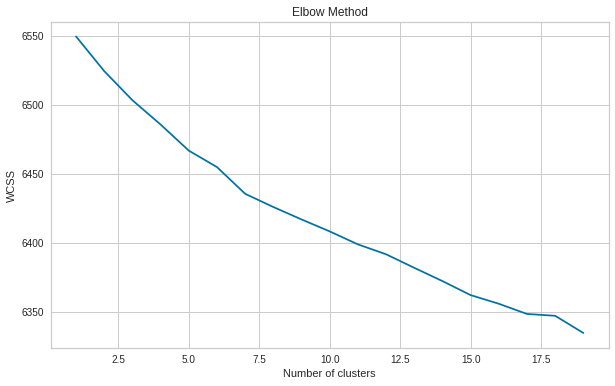

In [ ]:
# Elbow method to find the optimal value of k

wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_transformed)
    wcss.append(kmeans.inertia_)
    
# Plot chart    
plt.figure(figsize=(10,6))
plt.plot(range(1, 20), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

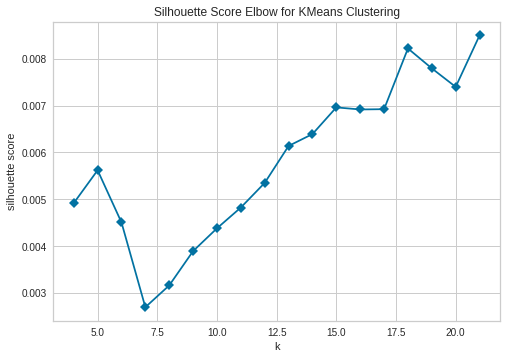

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# plot silhoutte score elbow for kmeans clustering
model = KMeans(random_state=5)
visualizer = KElbowVisualizer(model, k=(4,22), metric='silhouette', timings=False, locate_elbow=False)

visualizer.fit(X_transformed)
visualizer.show()

In [ ]:
# Define a function for silhouette_score_analysis
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters, random_state=5)
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)
      # Fit the training data to the visualizer   
      visualizer.fit(X_transformed) 
      visualizer.poof() 

For n_clusters = 2, silhouette score is 0.0032267948394357517


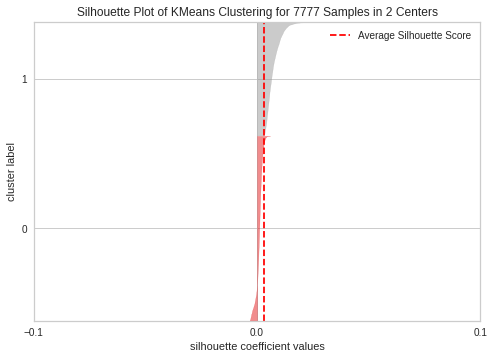

For n_clusters = 3, silhouette score is 0.0042459846954243


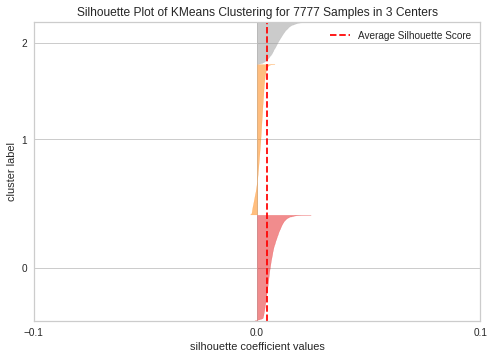

For n_clusters = 4, silhouette score is 0.004918705174687313


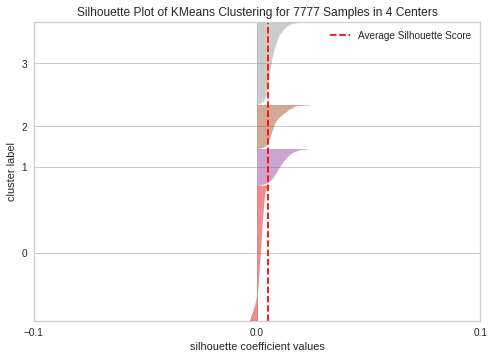

For n_clusters = 5, silhouette score is 0.005620266686547893


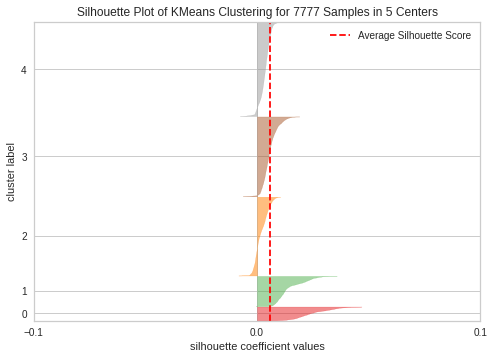

For n_clusters = 6, silhouette score is 0.004506619762168471


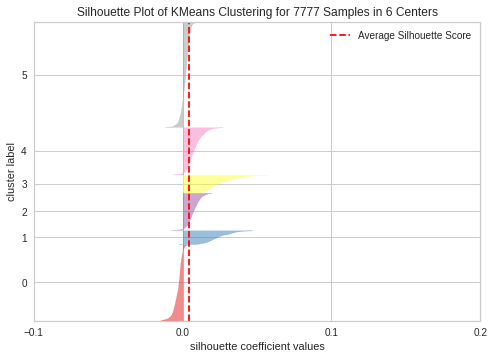

For n_clusters = 7, silhouette score is 0.002697628344289859


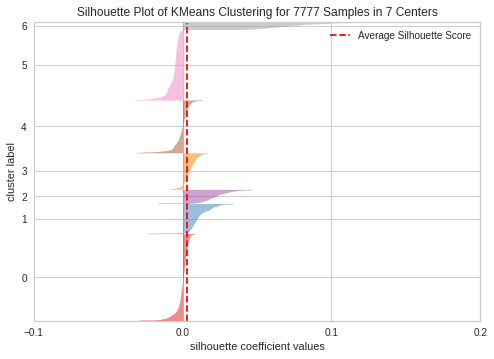

For n_clusters = 8, silhouette score is 0.0031629975207599754


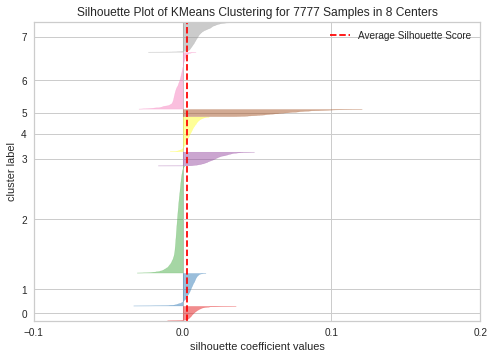

For n_clusters = 9, silhouette score is 0.00389510456581103


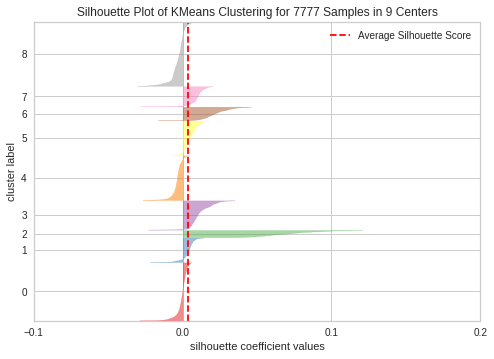

For n_clusters = 10, silhouette score is 0.004381186992892843


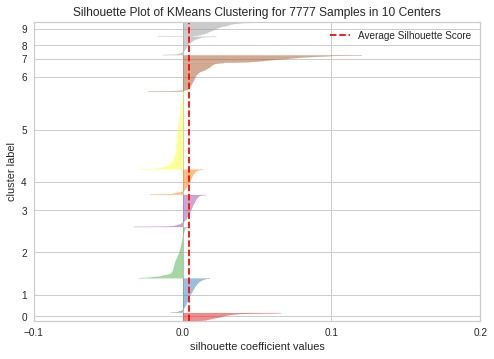

For n_clusters = 11, silhouette score is 0.00482499060777115


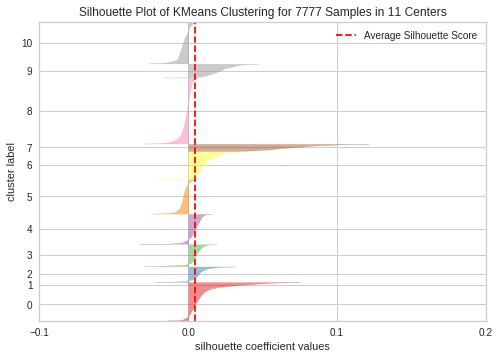

For n_clusters = 12, silhouette score is 0.005350645505183631


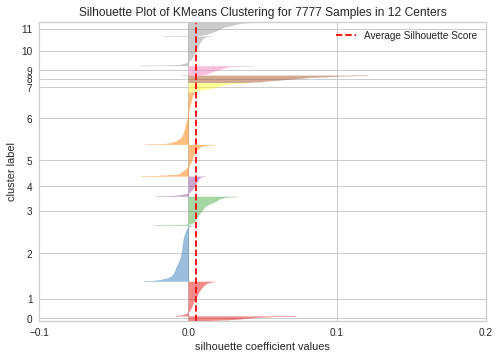

For n_clusters = 13, silhouette score is 0.006138570404089347


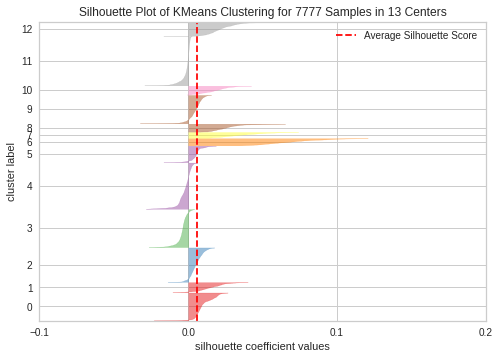

For n_clusters = 14, silhouette score is 0.006392194778474589


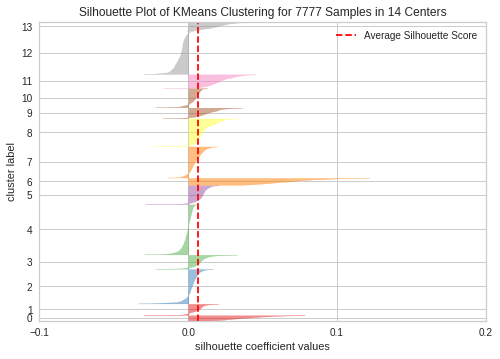

For n_clusters = 15, silhouette score is 0.006961191117244185


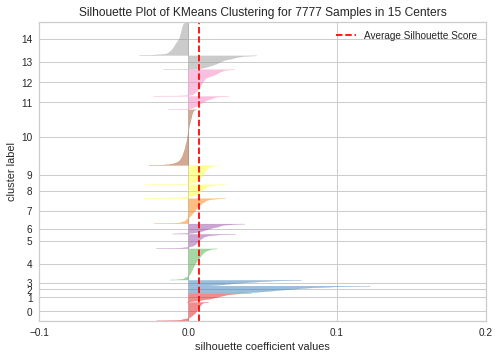

For n_clusters = 16, silhouette score is 0.006917161402555507


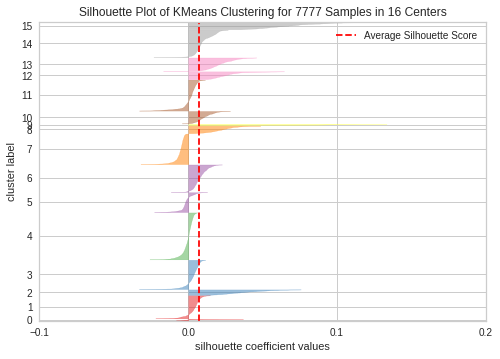

For n_clusters = 17, silhouette score is 0.006923223487707969


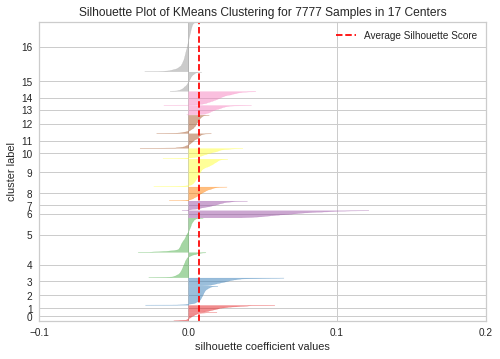

For n_clusters = 18, silhouette score is 0.008218820953008276


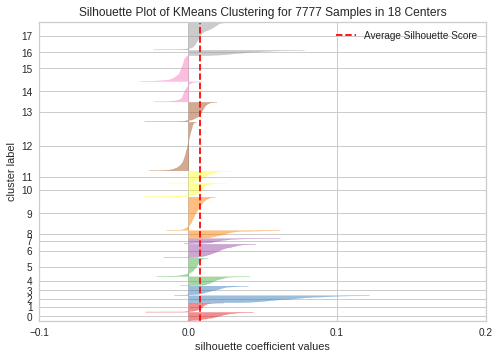

For n_clusters = 19, silhouette score is 0.0077942544268303745


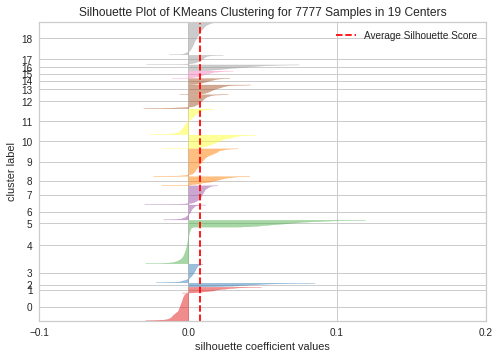

For n_clusters = 20, silhouette score is 0.007398820450402008


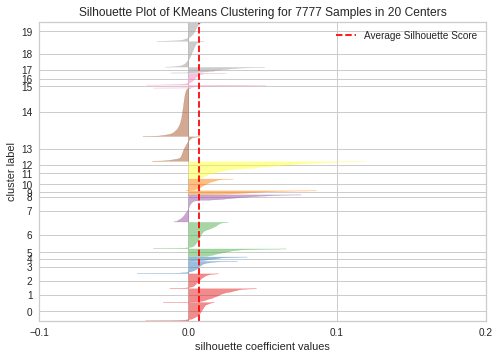

For n_clusters = 21, silhouette score is 0.008497335591166229


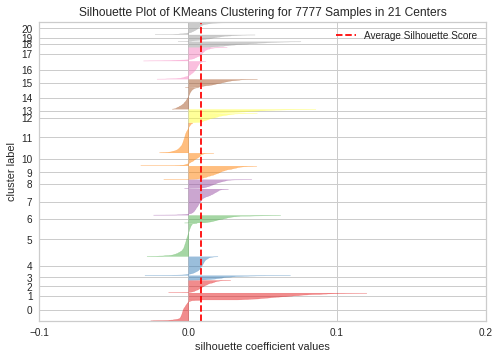

For n_clusters = 22, silhouette score is 0.007443097371103899


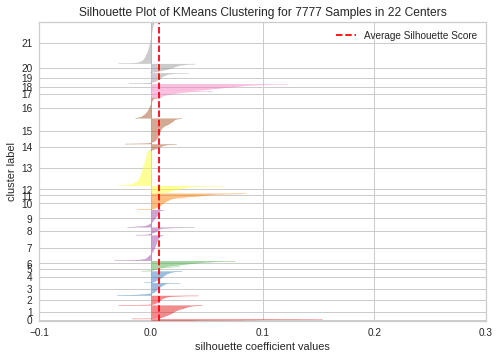

For n_clusters = 23, silhouette score is 0.00707369475189075


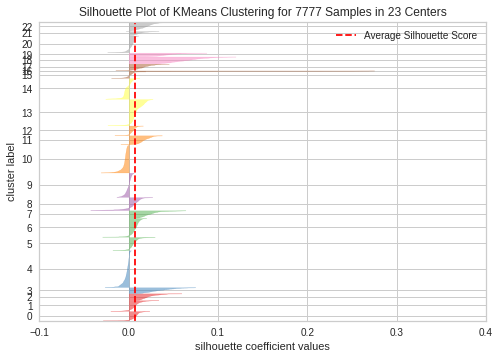

For n_clusters = 24, silhouette score is 0.008125446914017004


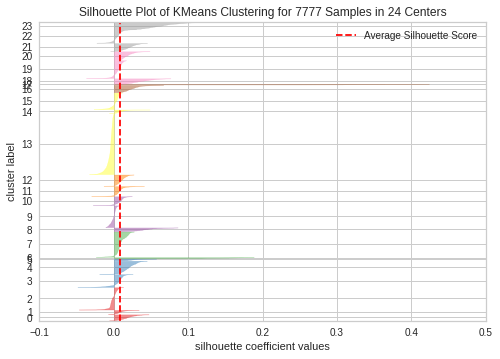

In [ ]:
silhouette_score_analysis(25)

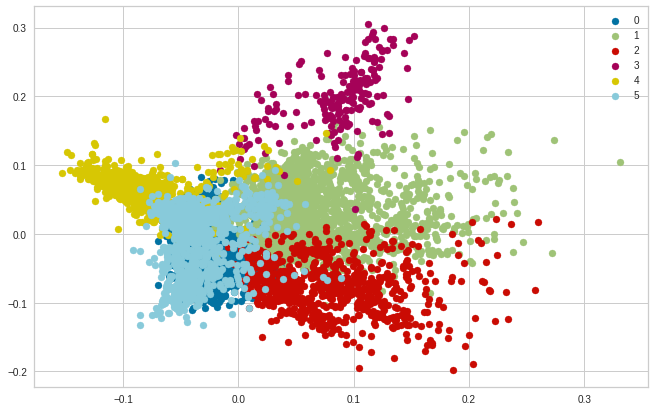

In [ ]:
# ML Model - 1 Implementation
# Fit the Algorithm
kmeans= KMeans(n_clusters=6, init= 'k-means++', random_state=9)
kmeans.fit(X_transformed)

#predict the labels of clusters.
label = kmeans.fit_predict(X_transformed)

#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
plt.figure(figsize=(11,7))
for i in unique_labels:
    plt.scatter(X_transformed[label == i , 0] , X_transformed[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['cluster_number'] = kmeans.labels_

In [ ]:
# Word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = [['cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])

  # Create stopword list:
  stopwords = set(STOPWORDS)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

### ML Model - 2

###**Hierarchical clustering**

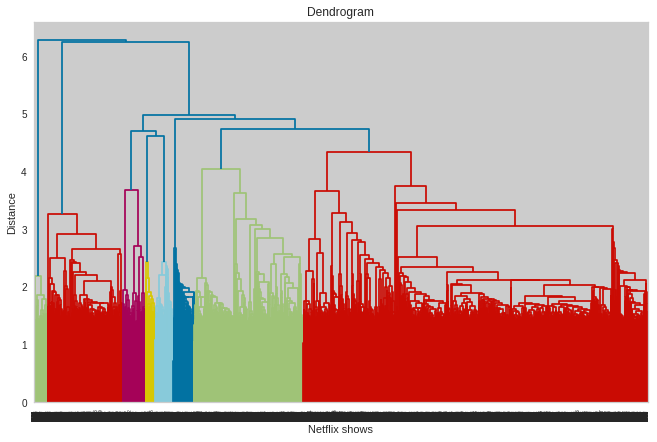

In [ ]:
# Compute the linkage matrix
Z = shc.linkage(X_transformed, method='ward')

# Plot the dendrogram
plt.figure(figsize=(11, 7))
plt.title('Dendrogram')
plt.xlabel('Netflix shows')
plt.ylabel('Distance')
shc.dendrogram(Z)
plt.show()

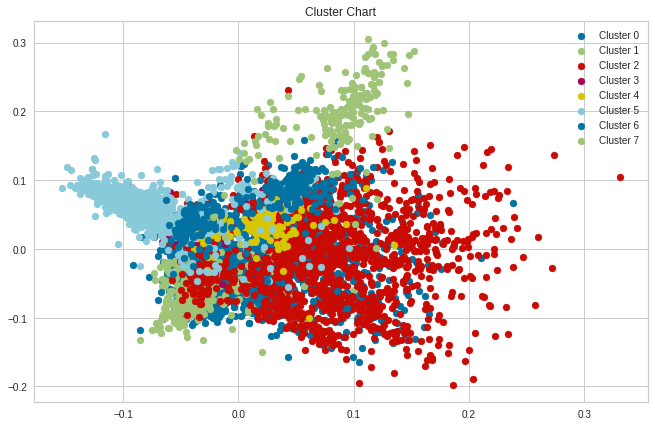

In [ ]:
# Perform clustering with optimal number of clusters
model = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(X_transformed)

# Plot the cluster chart
plt.figure(figsize=(11, 7))
unique_labels = set(clusters)
for i in unique_labels:
    plt.scatter(X_transformed[clusters == i , 0] , X_transformed[clusters == i , 1] , label = f'Cluster {i}')
plt.title('Cluster Chart')
plt.legend()
plt.show()

In [ ]:
# Add cluster values to the dateframe.
df['Hierarchical_cluster_number'] = kmeans.labels_

In [ ]:
# Word cloud for user rating review
def func_select_Category(category_name,column_of_choice):
  df_word_cloud = [['Hierarchical_cluster_number',column_of_choice]].dropna()
  df_word_cloud = df_word_cloud[df_word_cloud['Hierarchical_cluster_number']==category_name]
  text = " ".join(word for word in df_word_cloud[column_of_choice])

  # Create stopword list:
  stopwords = set(STOPWORDS)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

  # Plot the wordclouds
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f'Cluster: {i}')
  plt.axis("off")
  plt.show()

In [ ]:
for i in range(10):
  func_select_Category(i,'cluster_df')

AttributeError: ignored

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***